In [1]:
# Step 1: Basic EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Dataset load
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Crop_recommendation.csv")

In [4]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
# 1️⃣ Preview dataset
print("\n--- Dataset Preview ---")
print(df.head())



--- Dataset Preview ---
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [6]:
# 2️⃣ Shape
print(f"\nRows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 2200, Columns: 8


In [7]:
df.shape

(2200, 8)

In [8]:
# 3️⃣ Missing values
print("\n--- Missing Values ---")
print(df.isna().sum())


--- Missing Values ---
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [9]:
# 4️⃣ Data types
print("\n--- Data Types ---")
df.dtypes


--- Data Types ---


,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [10]:
# 5️⃣ Duplicate count
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_count}")


Duplicate Rows: 0


In [11]:
# 6️⃣ Unique values in each column
print("\n--- Unique Values Count ---")
print(df.nunique())


--- Unique Values Count ---
N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64


In [12]:
# 7️⃣ Numerical summary
print("\n--- Numerical Summary ---")
print(df.describe())


--- Numerical Summary ---
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [13]:
# 8️⃣ Target distribution
label_counts = df['label'].value_counts()
print("\n--- Target Distribution ---")
print(label_counts)


--- Target Distribution ---
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


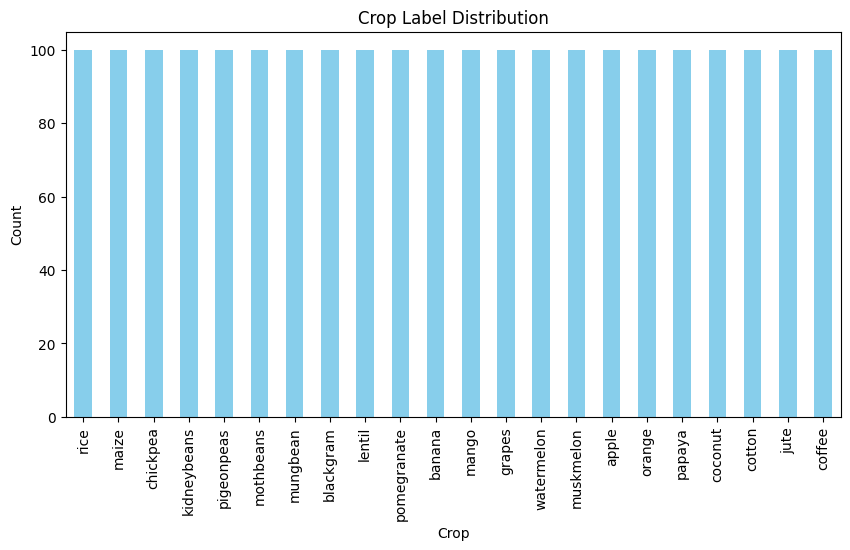

In [14]:
# Plot Target Distribution
plt.figure(figsize=(10,5))
label_counts.plot(kind='bar', color='skyblue')
plt.title("Crop Label Distribution")
plt.xlabel("Crop")
plt.ylabel("Count")
plt.show()

In [15]:
# Step 2: Detailed EDA
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

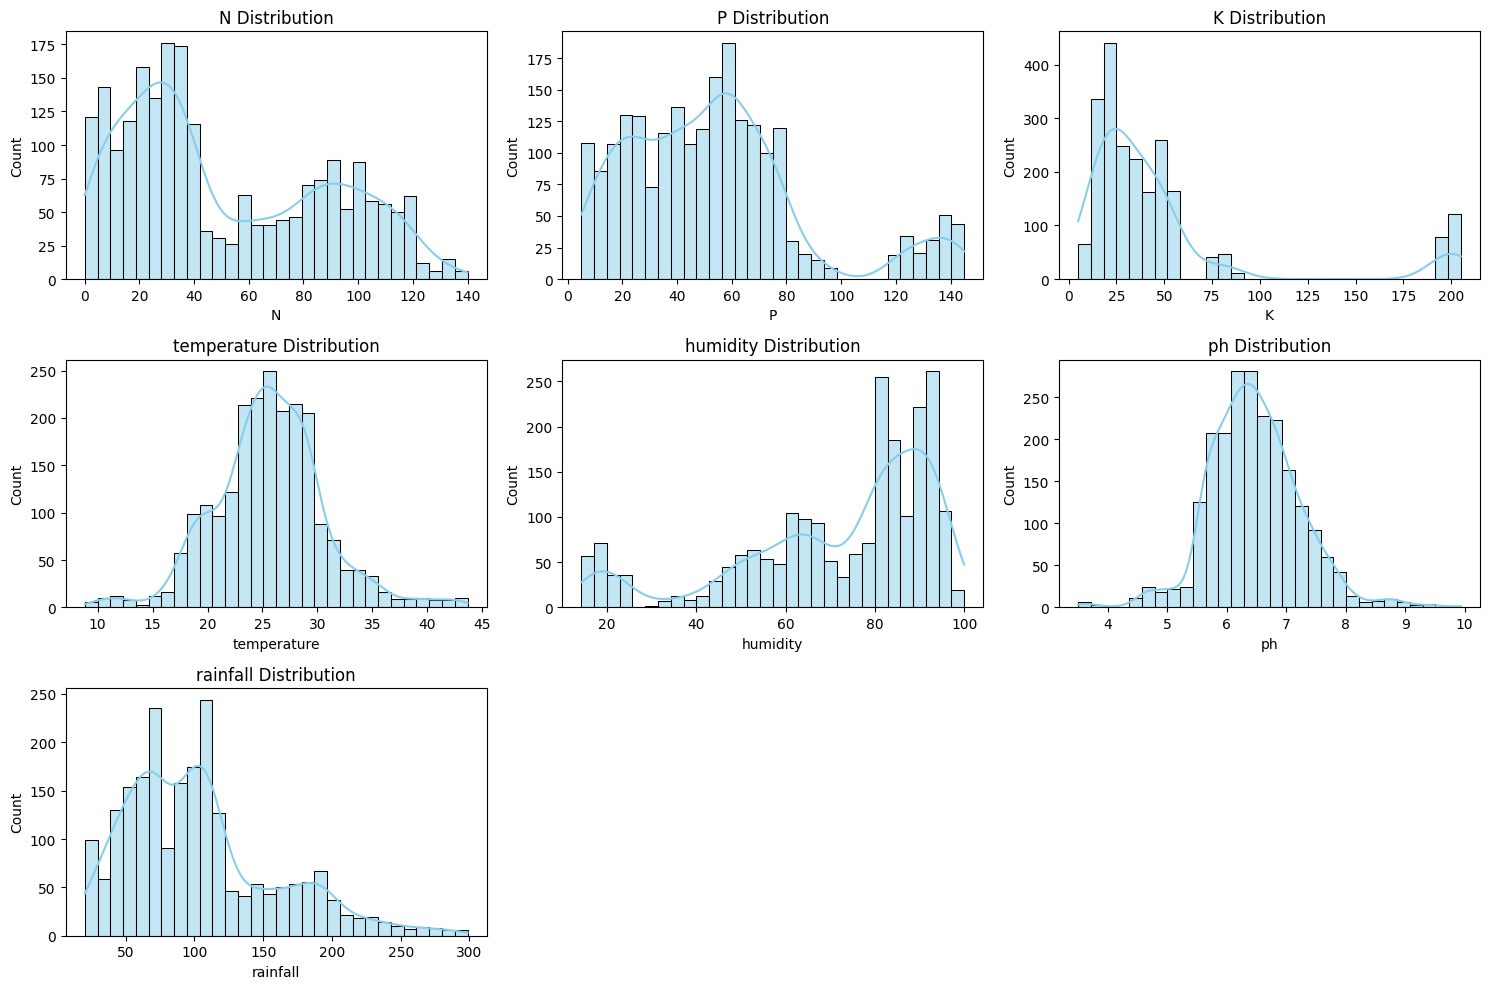

In [16]:
# 1️⃣ Histograms with KDE
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

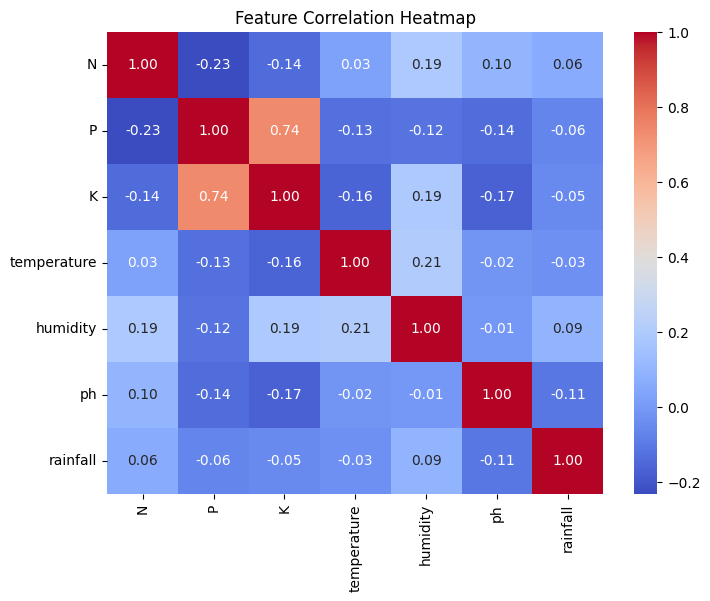

In [17]:
# 2️⃣ Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

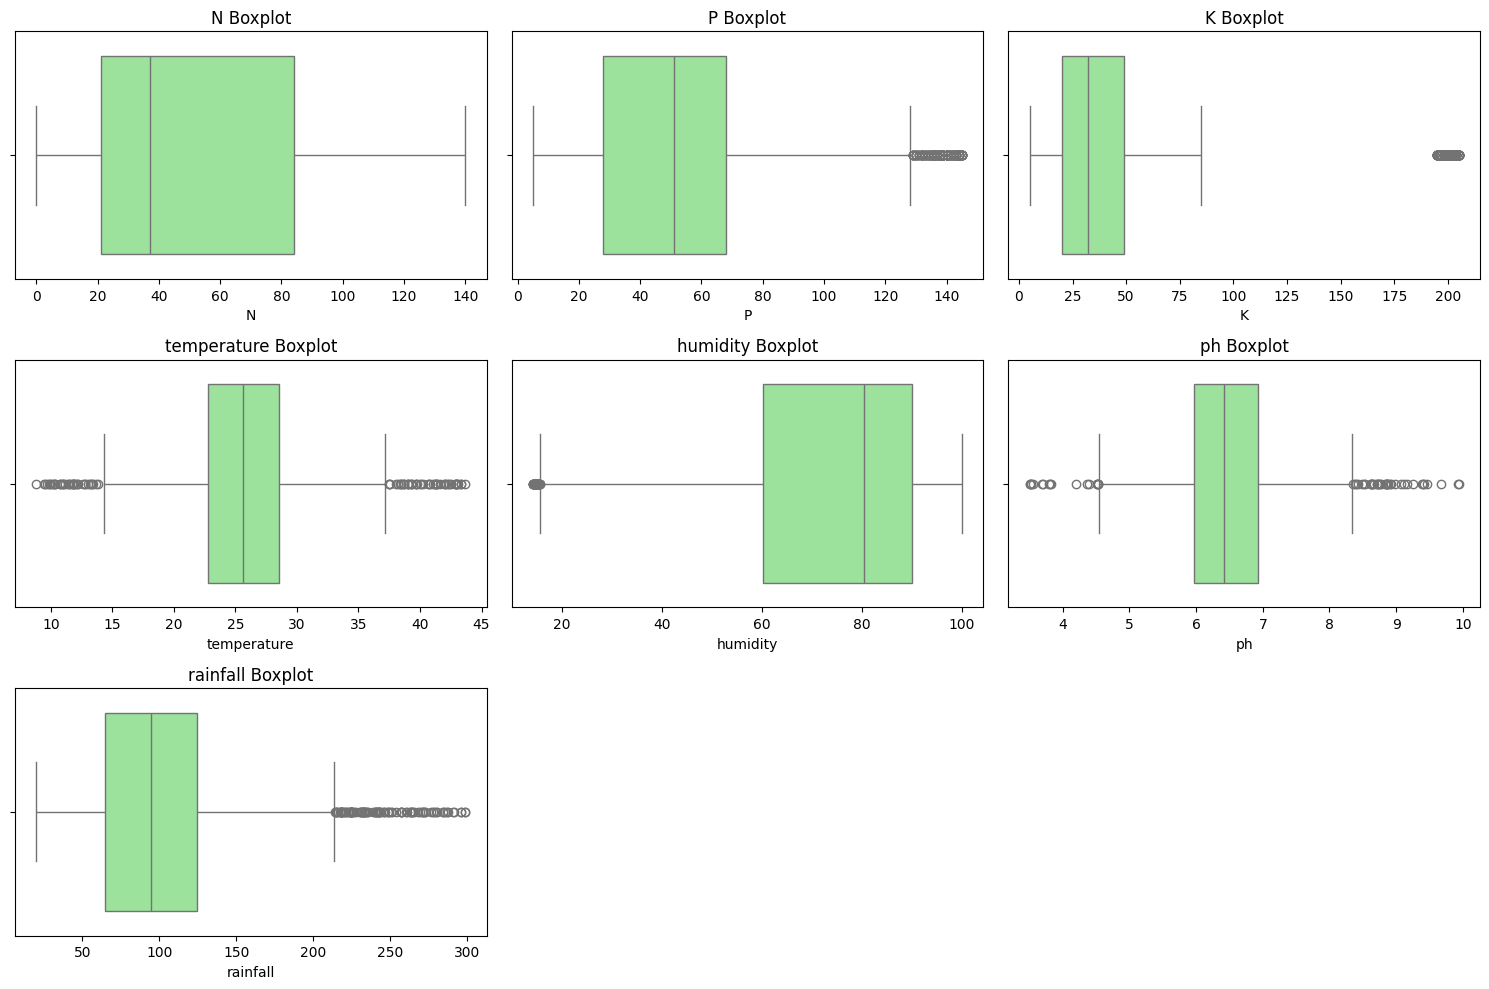

In [18]:
# 3️⃣ Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

In [19]:
# Step 3: Multiple algorithms train + compare accuracy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [20]:
# 1️⃣ Features & Target split
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

In [21]:
# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
# 3️⃣ Scaling for algorithms that need it (KNN, SVM, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# 4️⃣ Model list
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', random_state=42)
}

In [ ]:
# 5️⃣ Train & Evaluate
results = []
for name, model in models.items():
    
    if name in ["KNN", "Logistic Regression", "SVM (RBF Kernel)"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results.append((name, acc))

In [25]:
# 6️⃣ Show accuracy
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print(results_df)

                 Model  Accuracy
0        Random Forest  0.995455
4     SVM (RBF Kernel)  0.984091
1        Decision Tree  0.979545
2                  KNN  0.979545
3  Logistic Regression  0.972727


In [26]:
#Step 4 – Save Best Model to .pkl

import pickle as pkl

In [ ]:

best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)  


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:

bundle = {
    "model": best_model,
    "feature_cols": ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],
    "classes": best_model.classes_
}

In [ ]:

with open('Crop_recommendation_RF.pkl', 'wb') as f:
    pkl.dump(bundle, f)

print("✅ Model saved as Crop_recommendation_RF.pkl")

✅ Model saved as Crop_recommendation_RF.pkl
